<a href="https://colab.research.google.com/github/Erike-Simon/CESAR-AED/blob/main/MoDesc_clusterizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade:** Clusterização (Modelos Hierárquicos Aglomerativos)

**Grupo 3:**
* *Anna Carolina de Roldão*
* *Arthur Lira*
* *Erike Simon*
* *José Aparecido Silvano de Albuquerque*
* *Yaci Mair da Silva Ribeiro*


**Descrição**

Atilizando os critérios de ligação **Single Link**, **Average Link** e **Complete Link**, serão analisados os clusters em um conjunto de dados de clientes, analisando os dendogramas destes em grupos com base em seu gênero, idade, renda anual e pontuação de gastos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Configurações

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/mall_customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Limpeza e análise de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
le = preprocessing.LabelEncoder()

le.fit(df['Genre'])

df['Genre_le'] = le.transform(df['Genre'])

In [ ]:
df.drop(['Genre'], axis=1, inplace=True)

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_le
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000


In [ ]:
df = df.set_index('CustomerID')

In [ ]:
!pip install ydata-profiling

In [ ]:
from pandas_profiling import ProfileReport

<ipython-input-10-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile = ProfileReport(df, title='Relatório de Perfil de Dados', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Clusterização

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster
import numpy as np

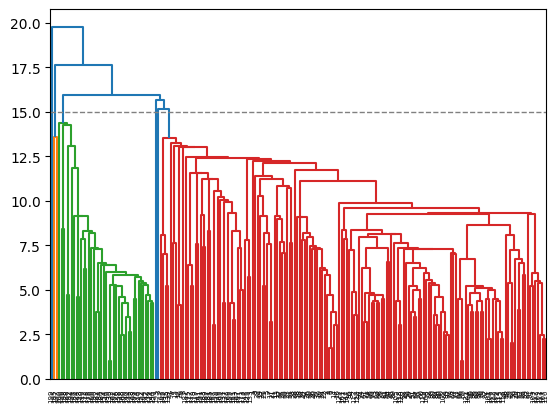

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Calculate the distance entre cada amostra
Z = single(df)

# Control number of clusters in the plot + add horizontal line.
dendrogram(Z, color_threshold=15, labels=df.index)
plt.axhline(y=15, c='grey', lw=1, linestyle='dashed')
plt.figure(figsize=(12, 8))

# Show the graph
plt.show()

In [ ]:
labels = fcluster(Z, t=15, criterion='distance')

In [ ]:
df['cluster_id'] = labels

In [ ]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_le',
       'cluster_id'],
      dtype='object')

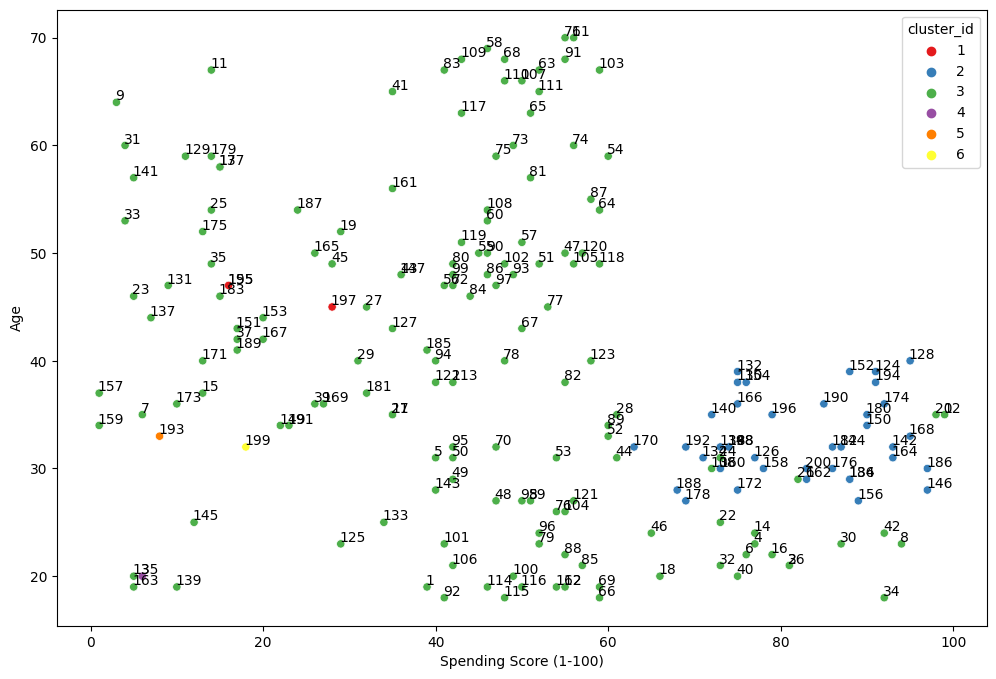

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(df, x='Spending Score (1-100)', y='Age', hue='cluster_id', palette='Set1')

# Annotate each point with its index
for i, row in enumerate(df.iterrows()):
    plt.annotate(row[0], (row[1]['Spending Score (1-100)'] - 0.15, row[1]['Age'] + 0.2), ha='left')

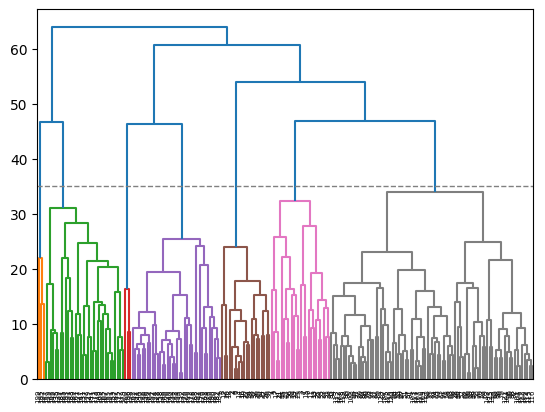

In [ ]:
# Calculate the distance entre cada amostra
Z = average(df)


# Control number of clusters in the plot + add horizontal line.
dendrogram(Z, color_threshold=35, labels=df.index)
plt.axhline(y=35, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

In [ ]:
labels = fcluster(Z, t=35, criterion='distance')

In [ ]:
df['cluster_id'] = labels

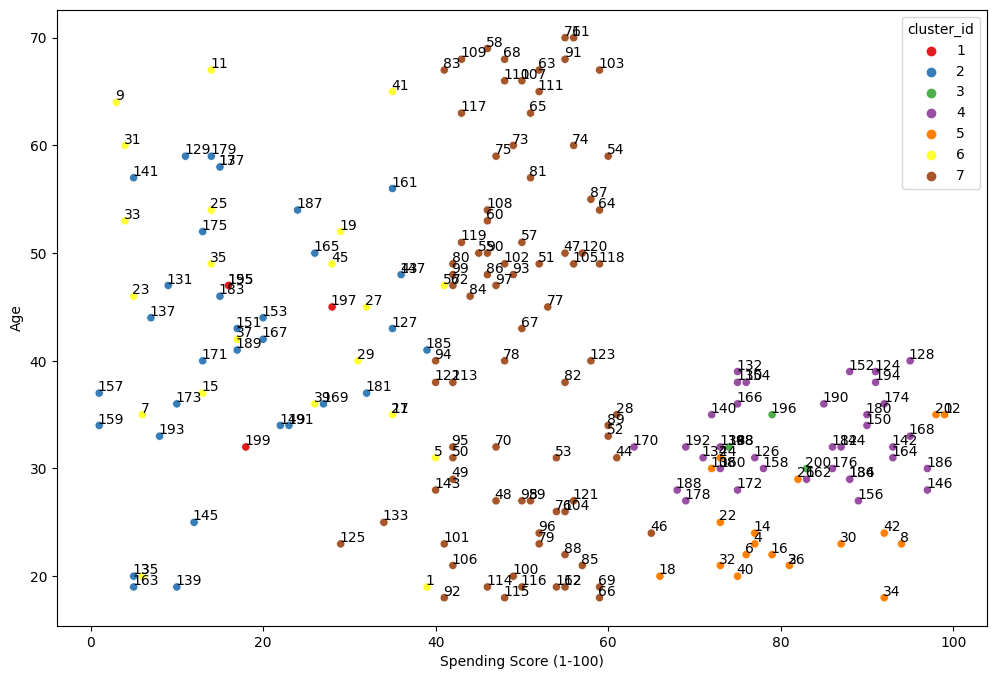

In [ ]:
plt.figure(figsize=(12, 8))

sns.scatterplot(df, x='Spending Score (1-100)', y='Age', hue='cluster_id', palette='Set1')

# Annotate each point with its index
for i, row in enumerate(df.iterrows()):
    plt.annotate(row[0], (row[1]['Spending Score (1-100)'] - 0.15, row[1]['Age'] + 0.2), ha='left')

Já se observa uma diferença entre usar o critério de ligação 'Average' em relação ao 'Single'. Utilizando o critério de ligação Average nota-se uma maior definição (ainda que misturada) dos clusters 1 ao 7.

## Linkage

In [ ]:
# Use a função sample() para obter amostras aleatórias (neste caso, 100 amostras)
df_samples = df.sample(n=30, random_state=42)  # random_state para reprodutibilidade

# Crie um novo DataFrame com as amostras aleatórias
df1 = pd.DataFrame(df_samples)

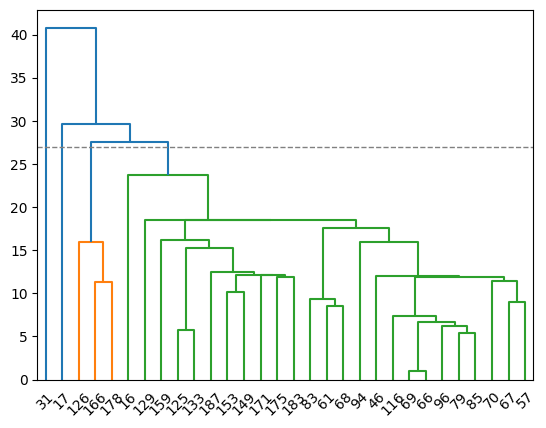

In [ ]:
# Calculate the distance entre cada amostra
Z1 = linkage(df1, method='single', metric='euclidean')

# Control number of clusters in the plot + add horizontal line.
dendrogram(Z1, color_threshold=27, labels=df1.index)
plt.axhline(y=27, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

In [ ]:
labels = fcluster(Z1, t=27, criterion='distance')

In [ ]:
df1['cluster_id'] = labels

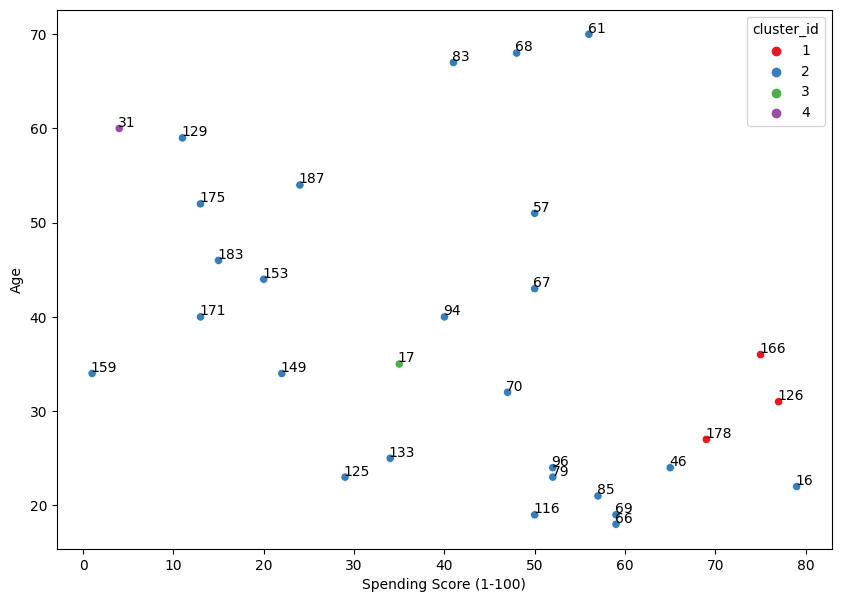

In [ ]:
plt.figure(figsize=(10, 7))

sns.scatterplot(df1, x='Spending Score (1-100)', y='Age', hue='cluster_id', palette='Set1')

# Annotate each point with its index
for i, row in enumerate(df1.iterrows()):
    plt.annotate(row[0], (row[1]['Spending Score (1-100)'] - 0.15, row[1]['Age'] + 0.2), ha='left')

Para uma amostra aleatória de 30 valores do dataset original 'df' e aplicando critério de ligação 'Single link', não é possível observar uma distinção clara dos 4 clusters.

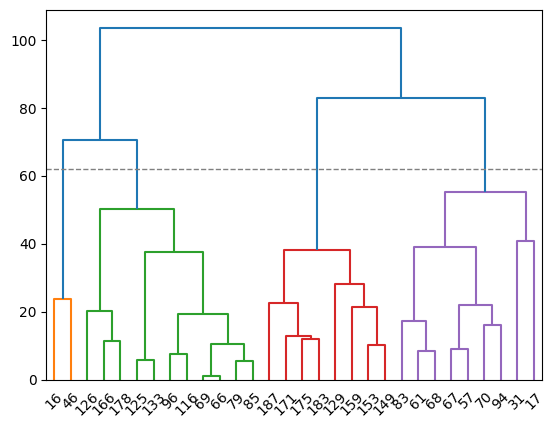

In [ ]:
# Calculate the distance between each sample
Z2 = linkage(df1, method='complete', metric='euclidean')

# Control number of clusters in the plot + add horizontal line.
dendrogram(Z2, color_threshold=62, labels=df1.index)
plt.axhline(y=62, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

In [ ]:
labels = fcluster(Z2, t=62, criterion='distance')

In [ ]:
df1['cluster_id'] = labels

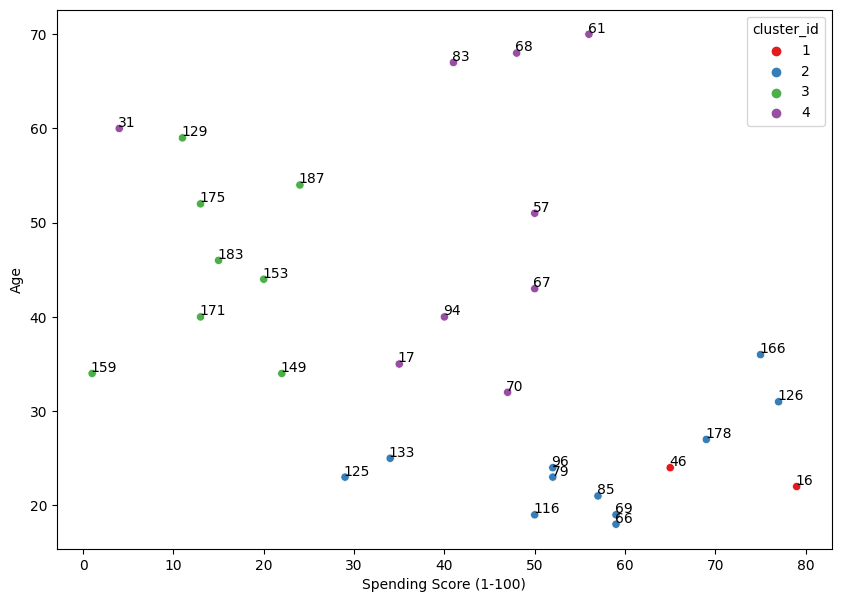

In [ ]:
plt.figure(figsize=(10, 7))

sns.scatterplot(df1, x='Spending Score (1-100)', y='Age', hue='cluster_id', palette='Set1')

# Annotate each point with its index
for i, row in enumerate(df1.iterrows()):
    plt.annotate(row[0], (row[1]['Spending Score (1-100)'] - 0.15, row[1]['Age'] + 0.2), ha='left')

Já utilizando o critério 'Complete link', observa-se uma melhor distinção entre os 4 clusters. Nota-se que o cluster verde possui uma idade entre 35 e 60 anos e um Spending Score de mais ou menos 1 até 25. O azul (mais espalhado e misturado com o cluster vermellho) possui idade entre 10 e 25 anos e Spending Score variando de 29 até quase 80. O cluster roxo possui uma distribuição maior em relação a idade (31 ou 32 anos até 70) e Spending Score mais concentrado entre 35 e 60 (com uma célula "perdida") com mais ou menos Spending de 5. O vermelho possui apenas duas células concentradas num range de idade de 13, 15 anos e Spending Score de 75 a 80.

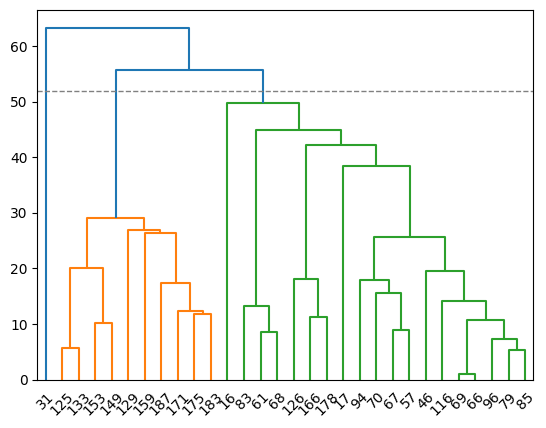

In [ ]:
# Calculate the distance between each sample
Z3 = linkage(df1, method='average', metric='euclidean')

# Control number of clusters in the plot + add horizontal line.
dendrogram(Z3, color_threshold=52, labels=df1.index)
plt.axhline(y=52, c='grey', lw=1, linestyle='dashed')

# Show the graph
plt.show()

In [ ]:
labels = fcluster(Z3, t=52, criterion='distance')

In [ ]:
df1['cluster_id'] = labels

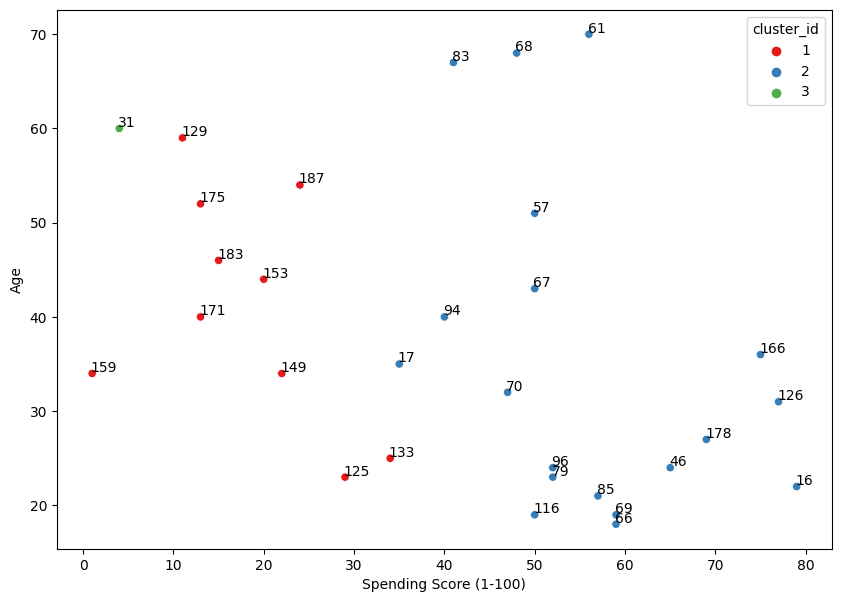

In [ ]:
plt.figure(figsize=(10, 7))

sns.scatterplot(df1, x='Spending Score (1-100)', y='Age', hue='cluster_id', palette='Set1')

# Annotate each point with its index
for i, row in enumerate(df1.iterrows()):
    plt.annotate(row[0], (row[1]['Spending Score (1-100)'] - 0.15, row[1]['Age'] + 0.2), ha='left')

Já utilizando o método 'Average Link' para um threshold de 52, observa-se mais claramente 2 dos 3 clusters. O vermelho possui idade entre 13-60 anos e Spending Score de 1 até 34. O cluster azul possui um range muito grande de idade (5 até 70) e Spending entre 34 e 80. Uma única célula (cluster) verde é observada.